In [1]:
# pr curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from numpy import argmax
from matplotlib import pyplot

In [4]:
# dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.97], flip_y=0, random_state=4)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
model = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=100, multi_class='auto', verbose=0)
model.fit(trainX, trainy)
yl = model.predict_proba(testX)
yl = yl[:, 1]
precision, recall, thresholds = precision_recall_curve(testy, yl)
# convert to f score by a simple formula
fscoreCV = (2 * precision * recall) / (precision + recall)
# largest f level calculation
ix = argmax(fscoreCV)
print('Best Th=%f, Fscore=%.4f' % (thresholds[ix], fscoreCV[ix]))

Best Th=0.573712, Fscore=0.7820


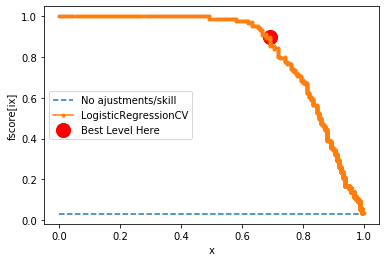

In [5]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No ajustments/skill')
pyplot.plot(recall, precision, marker='.', label='LogisticRegressionCV')
pyplot.scatter(recall[ix], precision[ix], marker='o', s=200, color='red', label='Best Level Here')
# axis labels
pyplot.xlabel('x')
pyplot.ylabel('fscore[ix]')
pyplot.legend()
pyplot.show()